# Computational Statistics 2020-2021
## Article implementation: "Convergence of Markovian Stochastic Approximation with Discontinuous Dynamics" 

This code implements the algorithm from the article [Convergence of Markovian Stochastic Approximation With Discontinous Dynamics](https://hal.archives-ouvertes.fr/hal-01418857).

In [328]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
import math
from scipy.stats import multivariate_normal as mvn
from matplotlib import cm

## The algorithm

## Application to quantile estimation: a toy example

The code bellow approximates the q-quantile of a normal distribution using the algorithm given in the article. Iterations of the algorithm write 
$$\theta_{n+1} = \theta + \frac{\gamma_0}{1+I_n+n}X_n,$$
where $X_n$ is drawn from a normal distribution and $I_n$ is the number of the set the sequences currently lives in. Using notations of the original article, this corresponds to the toy case where $\phi(x) = x$ and $P_\theta(x,\cdot) = \pi(\cdot) = \mathcal{N}(m,\sigma)$.

In [140]:
mean = 0
variance = 1

q = 9/10
x0 = 4
theta0 = 0.9
gamma0 = 10
n_sets = 100
precision = 3e-3


In [141]:
xes = []
thetas = []

for i in np.arange(1,n_sets):
    
    x = x0
    theta = theta0
    j = 0 
        
    while np.abs(theta) < norm.ppf(q) + n_sets/3: #Parametrization of sets K_i, centered around the true q-quantile

        x = np.random.normal(mean,variance)
    
        if x > theta:

            h = 0
        else:

            h = 1
        
        theta = theta + gamma0/((1+i+j))*(q-h)
        
        j += 1 
        
        xes.append(x)
        thetas.append(theta)
        
        if np.abs(norm.cdf((theta-mean)/variance)-q) < precision:
            
            break

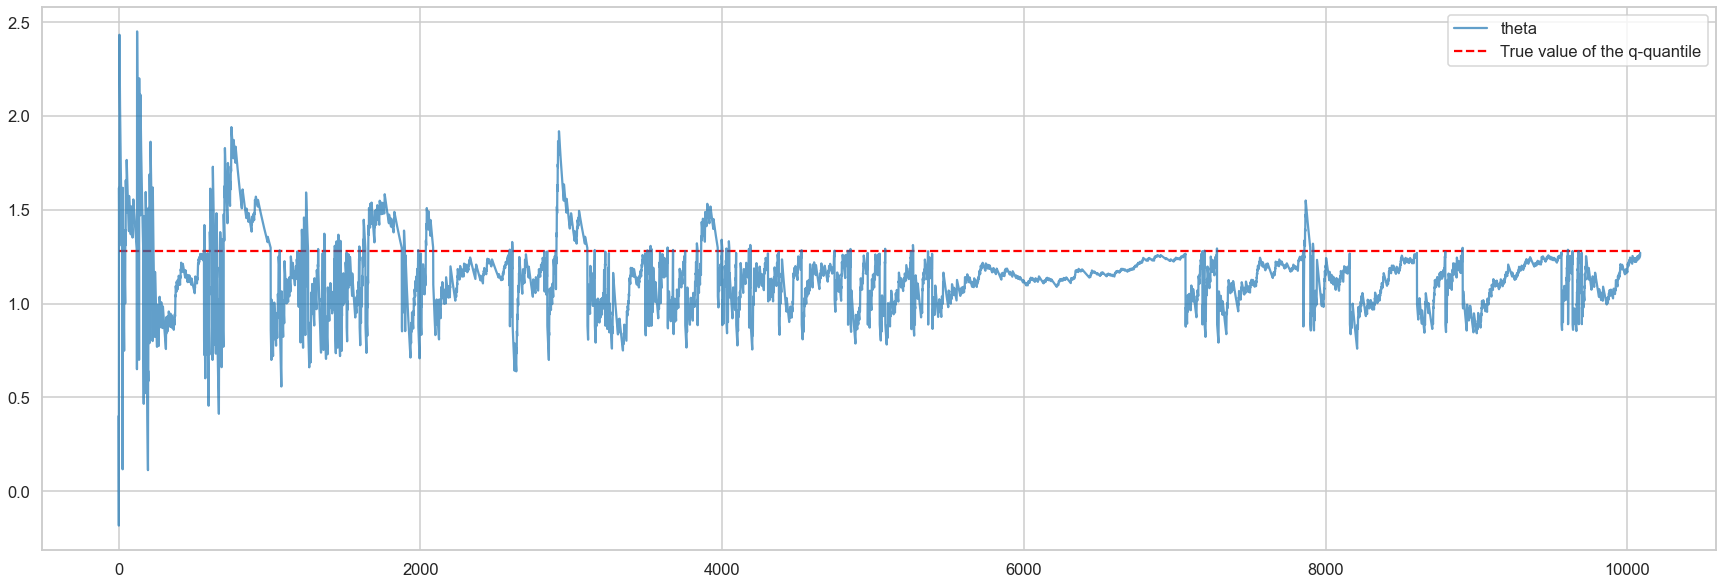

In [142]:
sns.set_style('whitegrid')
sns.set_context('talk')

fig,ax = plt.subplots(figsize=(30,10))
ax.plot(thetas, alpha=0.7, label='theta')
ax.hlines(norm.ppf(q),xmin=0,xmax=len(thetas), color='red',linestyle='--', label='True value of the q-quantile')
ax.legend()
plt.show()

## Application to median in multi-dimensional spaces estimation

Consider a random variable $X$ with probability distribution $\pi$ on $\mathbb{R}^d$. In this application, we are interrested in solving the problem 

$$\text{argmin}_{m \in \mathbb{R}^d} \mathbb{E}\left(||X-m||\right), $$
which can be seen as finding the multidimensional equivalent of the median.

In [315]:
mean = np.array([2,2])
variance = np.array([[2,-1],[-1,1]])
q = 9/10
x0 = np.array([3,4])
theta0 = np.array([0.3,0.8])
gamma0 = 10
n_sets = 100
precision = 3e-3


In [337]:
xes = []
thetas = []

for i in np.arange(1,n_sets):
    
    x = x0
    theta = theta0
    j = 0 
        
    while np.abs(theta[0]) <  mean[0] + n_sets/100 and np.abs(theta[1]) < mean[1] + n_sets/100: #Parametrization of sets K_i, centered around the true q-quantile

        x = variance@np.random.randn(2) + mean
    
        if x[0] == theta[0] and x[1] == theta[1]:

            h = 0
        
        else:

            h = (x-theta)/np.linalg.norm(x-theta)
        
        theta = theta + gamma0/((1+i+j))*h
        
        j += 1 
        
        xes.append(x)
        thetas.append(theta)
        
        if np.abs(theta[0]-mean[0]) < precision and np.abs(theta[1]-mean[1]) < precision:

            
            break


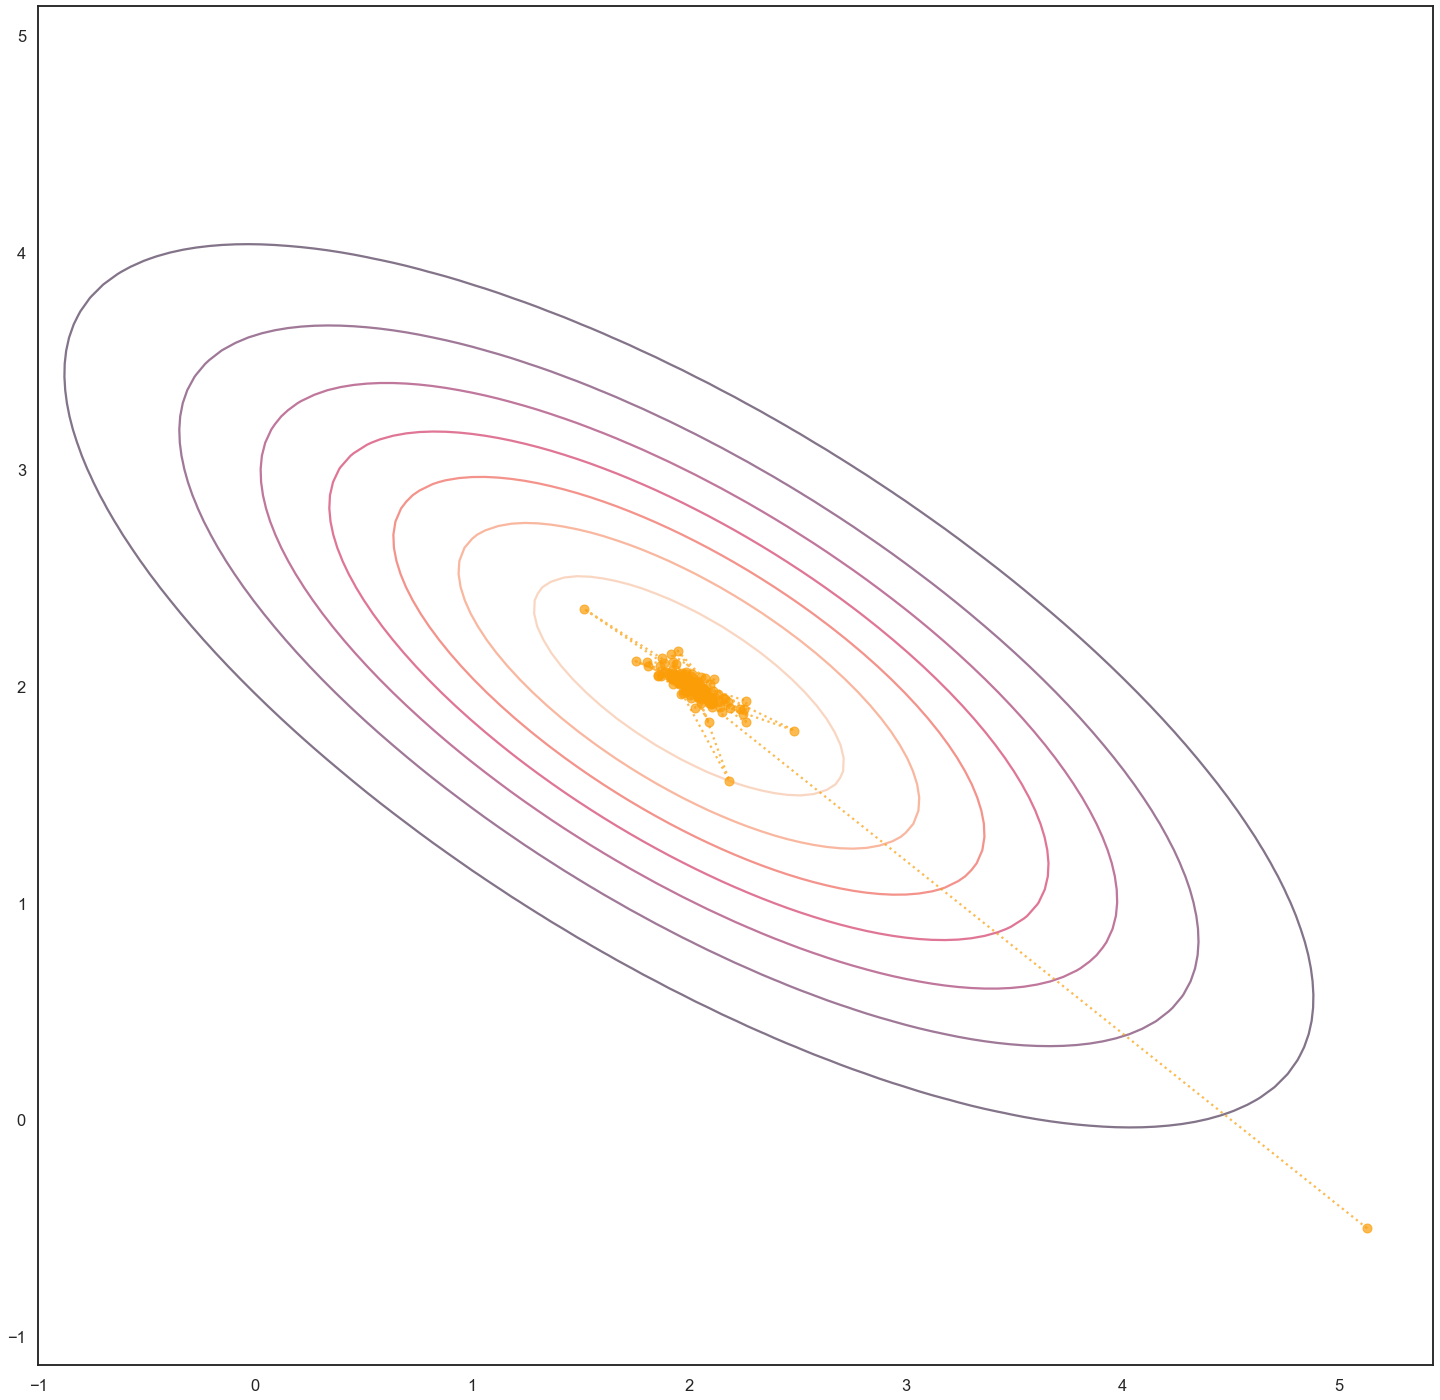

In [338]:
x, y = np.meshgrid(np.linspace(-1,5,100),np.linspace(-1,5,100))
xy = np.column_stack([x.flat, y.flat])

z = mvn.pdf(xy, mean, variance).reshape(x.shape)

thetas= np.array(thetas)
step= int(len(thetas)/150)

thetas_plot = thetas[0::step]

sns.set_style('white')

f,ax = plt.subplots(figsize=(25,25))

ax.contour(x, y, z,alpha=0.6)
ax.plot(thetas_plot[:,0],thetas_plot[:,1],alpha=0.7,linestyle='dotted',marker='o',color=cm.inferno(200))
plt.gca().axis('equal')
plt.show()


## Application to vector quantilization